## Tasks
Assigned to Sierra Stevenson, JSIP intern under Dr. Jonathan Jiang and Dr. Longtao Wu<p>
This analysis is intended to compare observed (MLS/AIRS/GPM_MERGIR) and simulated (UM) data to evaluate<br>how convection is resolved by storm-resolving models.

List of Tasks<p>
[DONE]&nbsp;&nbsp;&nbsp;Task 1 — UM moisture at 100 hPa map<br>
[DONE]&nbsp;&nbsp;&nbsp;Task 2 — MLS moisture at 100 hPa map<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Task 3 — UM/MLS/AIRS vert. profiles pressure vs temp/moisture<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Task 4 — UM/MLS PDFs (moisture)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Task 5 — UM/GPM_MERGIR PDFs (brightness temp)

UM (monthly): Task 1,2
MLS (monthly): Task 1,2

UM (hourly): Task 3-5
MLS (hourly): Task 3-5
AIRS (hourly): 

## Code
Setup

In [3]:
import metpy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import scipy.stats as sst
import dask
import os
import glob
import below_god as bg
import seaborn as sns

from metpy.interpolate import log_interpolate_1d
from metpy.units import units
from netCDF4 import MFDataset, Dataset, num2date
from pydap.client import open_url

In [63]:
# Conversion factors
hPa_to_Pa = 100
kgkg_to_ppmv = 1.608 * 10 ** 6
VMR_to_ppmv = 10 ** 6

MLS data

In [183]:
# Path and date range
path = "/data/emls/l2gp/v05.01/2016/"
yday_range = np.arange(224,252+1)   # 08/11 - 09/08 (double check)

# Find min length of hourly data
lim = 4000
for day in yday_range:
    # print(day)
    if len(bg.io.read_l2gp(f'/data/emls/l2gp/v05.01/2016/{day}/MLS-Aura_L2GP-H2O_v05-01-c01_2016d{day}.he5')['value']) < lim:
        lim = len(bg.io.read_l2gp(f'/data/emls/l2gp/v05.01/2016/{day}/MLS-Aura_L2GP-H2O_v05-01-c01_2016d{day}.he5')['value'])
print(f"The minimum length of 'profile' values in the MLS L2 hourly datasets is {lim}.")

# Initialize xarray with first day
MLS_hrly = bg.io.read_l2gp('/data/emls/l2gp/v05.01/2016/224/MLS-Aura_L2GP-H2O_v05-01-c01_2016d224.he5')['value'][:lim]

# Fill in rest of hourly datasets
for day in yday_range:
    new = bg.io.read_l2gp(f'/data/emls/l2gp/v05.01/2016/{day}/MLS-Aura_L2GP-H2O_v05-01-c01_2016d{day}.he5')['value'][:lim]
    MLS_hrly = xr.concat([MLS_hrly, new], dim='day')

The minimum length of 'profile' values in the MLS L2 hourly datasets is 3402.


MLS hourly data screening

In [ ]:
# TODO (Ask for help from Ryan/Longtao)

MLS hourly data analysis (MOVE TO TASK 4/5)

In [192]:
# # Select moisture where pressure = 100 hPa
# MLS_h2o100_hrly = MLS_hrly.sel(lev=100) 

# # Flatten data to get PDF
# MLS_h2o100_hrly_flat = np.array(MLS_h2o100_hrly).ravel()
# np.save("MLS_h2o100_hrly_flat",MLS_h2o100_hrly_flat)

AIRS data (yearly)

In [10]:
# Starting with yearly
# TODO: When code is confirmed to work, set to daily and re-run after JPL work hours.

In [12]:
AIRS_file_names = []
AIRS_file1 = '/data/airs/AIRX3STD/v7/2003/AIRS.2003.08.15.L3.RetStd001.v7.0.3.0.G20202222706.hdf'
AIRS_data_yrly = xr.open_dataset(xr.backends.NetCDF4DataStore(Dataset(AIRS_file1)))

yearly_AIRS = '/data/airs/AIRX3STD/v7/*/AIRS.*.08.15.L3.RetStd001.v7.0.3.0.*.hdf'
# daily_AIRS = '/data/airs/AIRX3STD/v7/*/AIRS.*.08.*.L3.RetStd001.v7.0.3.0.*.hdf'     # TODO: Include up to 09/08

print("Beginning loop. Runtime: 9 sec per file. (2-4 min for yearly data; 70 min for daily data.")

for file in glob.glob(yearly_AIRS):
    print(file)
    AIRS_file_names.append(file)
    AIRS_data_yrly = xr.concat([AIRS_data_yrly, xr.open_dataset(xr.backends.NetCDF4DataStore(Dataset(file)))], dim="time")

Beginning loop. Runtime: 9 sec per file. (2 min for yearly data; 70 min for daily data.
/data/airs/AIRX3STD/v7/2003/AIRS.2003.08.15.L3.RetStd001.v7.0.3.0.G20202222706.hdf
/data/airs/AIRX3STD/v7/2004/AIRS.2004.08.15.L3.RetStd001.v7.0.3.0.G20195222930.hdf
/data/airs/AIRX3STD/v7/2005/AIRS.2005.08.15.L3.RetStd001.v7.0.3.0.G20194175526.hdf
/data/airs/AIRX3STD/v7/2006/AIRS.2006.08.15.L3.RetStd001.v7.0.3.0.G20193130345.hdf
/data/airs/AIRX3STD/v7/2007/AIRS.2007.08.15.L3.RetStd001.v7.0.3.0.G20192120413.hdf
/data/airs/AIRX3STD/v7/2008/AIRS.2008.08.15.L3.RetStd001.v7.0.3.0.G20191235723.hdf
/data/airs/AIRX3STD/v7/2009/AIRS.2009.08.15.L3.RetStd001.v7.0.3.0.G20191120349.hdf
/data/airs/AIRX3STD/v7/2010/AIRS.2010.08.15.L3.RetStd001.v7.0.3.0.G20185230916.hdf
/data/airs/AIRX3STD/v7/2011/AIRS.2011.08.15.L3.RetStd001.v7.0.3.0.G20184153420.hdf
/data/airs/AIRX3STD/v7/2012/AIRS.2012.08.15.L3.RetStd001.v7.0.3.0.G20183101552.hdf
/data/airs/AIRX3STD/v7/2013/AIRS.2013.08.15.L3.RetStd001.v7.0.3.0.G20181235357.hdf

In [252]:
AIRS_prs = AIRS_data['StdPressureLev:ascending']

In [266]:
AIRS_data = AIRS_data_yrly.mean(dim='time')

# Global Average 
# Average ascending/descending temperature
AIRS_t_A = AIRS_data['Temperature_A'].mean(dim=['YDim:ascending', 'XDim:ascending', ])                              # Ascending orbit temperature
AIRS_t_D = AIRS_data['Temperature_D'].mean(dim=['YDim:descending', 'XDim:descending'])                              # Descending orbit temperature
AIRS_t = (AIRS_t_A.values + AIRS_t_D.values) / 2                                                                    # Average temperature
AIRS_t_prs = (AIRS_t_A['StdPressureLev:ascending'].values + AIRS_t_D['StdPressureLev:descending'].values) / 2       # Temperature-associated pressure

# Average ascending/descending moisture
AIRS_h2o_A = AIRS_data['H2O_MMR_A'].mean(dim=['YDim:ascending', 'XDim:ascending'])                                  # Ascending orbit moisture
AIRS_h2o_D = AIRS_data['H2O_MMR_D'].mean(dim=['YDim:descending', 'XDim:descending'])                                # Descending orbit moisture
AIRS_h2o = ((AIRS_h2o_A.values + AIRS_h2o_D.values) / 2) * kgkg_to_ppmv                                             # Average moisture
AIRS_h2o_prs = (AIRS_h2o_A['H2OPressureLev:ascending'].values + AIRS_h2o_D['H2OPressureLev:descending'].values) / 2 # Moisture-associated pressure
AIRS_h2o_prs = AIRS_h2o_prs

AIRS/MLS: Pressure vs. moisture/temperature

In [240]:
# # Find MLS data where pressure < 300 hPa
# MLS_prs_idxs_under300 = np.where(MLS_prs * hPa_to_Pa <= (300 + 50), np.arange(len(MLS_prs)), np.nan)       # Get list of indexes where MLS pressure < 300 hPa
# MLS_prs_idxs_under300 = MLS_prs_idxs_under300[~np.isnan(MLS_prs_idxs_under300)].astype(int)                # Remove NaNs and convert values to integers in list
# MLS_h2o_under300 = MLS_h2o.mean(dim=['Lat','Lon'])[MLS_prs_idxs_under300]                                  # Get corresponding moisture values

# # Find AIRS data where pressure >= 300 hPa
# AIRS_prs_idxs_over300 = np.where(AIRS_h2o_prs >= 300, np.arange(len(AIRS_h2o_prs)), np.nan)               # Get list of indexes where AIRS pressure >= 300 hPa
# AIRS_prs_idxs_over300 = AIRS_prs_idxs_over300[~np.isnan(AIRS_prs_idxs_over300)].astype(int)             # Remove NaNs and convert values to integers in list
# AIRS_h2o_over300 = AIRS_h2o[AIRS_prs_idxs_over300]   

UM Data

In [282]:
# Folder containing data
path = '/nas/bigdata_static/longtaow/'

# Read in UM data
UM_data_hus = xr.open_mfdataset(path+'DYAMOND/Monsoon/hus/*.nc', parallel=True)     # Moisture (kg/kg)
UM_data_prs = xr.open_mfdataset(path+'DYAMOND/Monsoon/pfull/*.nc', parallel=True)   # Pressure (Pa)

print("UM data read.")

# Temporal average
UM_avg_prs = UM_data_prs.mean(dim='time')     # Pressure
UM_avg_hus = UM_data_hus.mean(dim='time')     # Moisture

# Model level number start/end indexes enclosing 100 hPa
lv1, lv2 = 45, 55

# Isolate pressure data variable
UM_prs = UM_avg_prs['air_pressure'][:,lv1:lv2]

# Isolate moisture data and convert units from kg/kg to ppmv
UM_hus = UM_avg_hus['specific_humidity'][:,lv1:lv2] * kgkg_to_ppmv

UM data read.


In [ ]:
UM_hus_flat = UM_hus.ravel()

## Figures

Define coordinates for monsoon regions

In [283]:
# Asian Monsoon [[lat1,lat2],[lon1,lon2]
AM_outercoords = [[-10,50],[0,180]]
AM_box = [[20,40],[40,140]]

# North American Monsoon
NAM_outercoords = [[-10,50],[-180,0]]
NAM_box = [[-10,40],[-140,60]]

Labels for plotting

In [196]:
# All
date_range = "08/11/2016 — 09/08/2016"

# UM
UM_name = "Unified Model"

# MLS
MLS_dates = "08/2004 — 08/2022"
MLS_name = "MLS"

# GPM_MERGIR
GPM_name = "GPM_MERGIR Data"

Functions for figure creation

In [278]:
def CreateVertProfile(arr, arr_prs, arr2=0, arr2_prs=None, data_label="Moisture", source="AIRS", source2="MLS", date_range=date_range, custom_units=None, full_AIRS=None):
    if data_label == "Moisture":
        units = "ppmv"
        color = "darkblue"
    elif data_label == "Temperature":
        units = "°C"
        color = "darkred"
    else:
        units = custom_units
    plt.title(f"Vertical Profiles of Pressure (hPa) vs. {data_label} ({units})\nfrom {source} Data for {date_range}")
    plt.ylabel("Pressure (hPa)")
    plt.xlabel(f"{data_label} ({units})")
    plt.gca().invert_yaxis()

    plt.plot(arr, arr_prs, label=source, color=color)

    if np.array(arr2).any() == True:
        plt.plot(arr2, arr2_prs, label=source2, color="gray")
        plt.legend()
    if full_AIRS == True:
        plt.plot(AIRS_h2o, AIRS_h2o_prs, label="AIRS (full)", zorder=-1, alpha=1, linewidth=2, linestyle="--", color="darkblue")
    plt.show()

Task 3: Vertical profiles of pressure vs. temperature/moisture (UM, MLS)

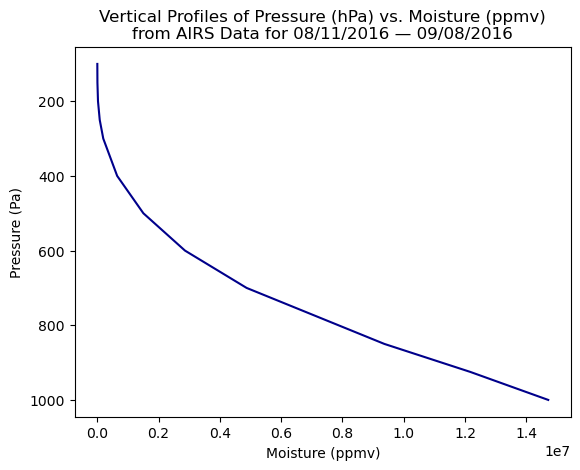

BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

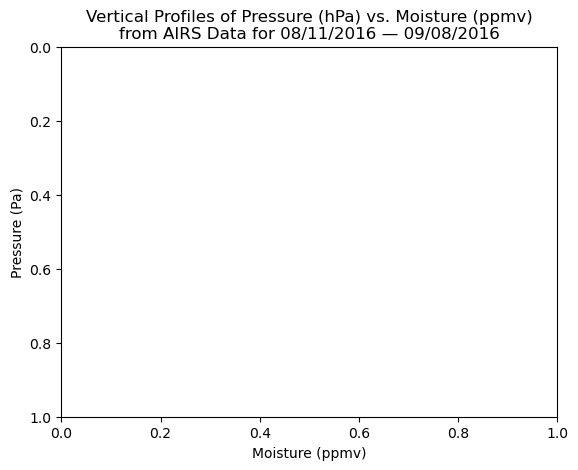

In [284]:
# Pressure vs. Moisture (MLS/AIRS)
CreateVertProfile(AIRS_h2o, AIRS_h2o_prs, UM_hus, UM_prs)   # TODO: Add MLS data
CreateVertProfile(UM_hus, UM_prs) # TODO: UM data

# Pressure vs. Temperature  (AIRS)
CreateVertProfile(AIRS_t-273.15, AIRS_t_prs, data_label="Temperature")
# CreateVertProfile(UM_t, UM_t_prs, data_label="Temperature")   # TODO: UM data

In [198]:
# # Pressure vs. Moisture (MLS/AIRS)
# CreateVertProfile(AIRS_h2o_over300, AIRS_h2o_prs[AIRS_prs_idxs_over300], MLS_h2o_under300, MLS_prs[MLS_prs_idxs_under300] * hPa_to_Pa, full_AIRS=True)

# # Pressure vs. Temperature  (AIRS)
# CreateVertProfile(AIRS_t-273.15, AIRS_t_prs, data_label="Temperature")

NameError: name 'AIRS_h2o_over300' is not defined

KeyboardInterrupt: 

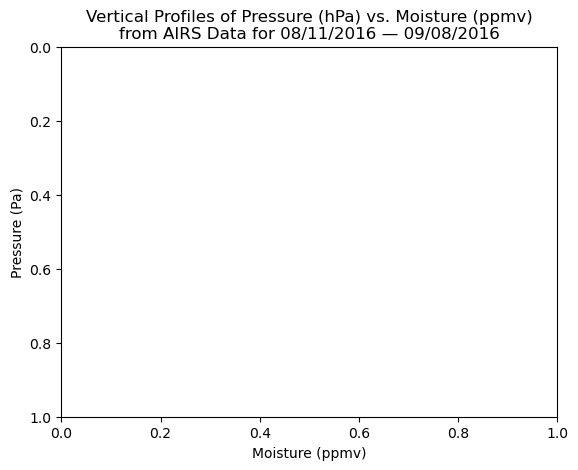

In [ ]:
# Pressure vs. Moisture (UM)
CreateVertProfile(UM_hus, UM_prs)

# Pressure vs. Temperature  (UM)
# CreateVertProfile(UM_ta-273.15, UM_prs, data_label="Temperature")

Task 4: PDFs of moisture at 100 hPa (UM, MLS)

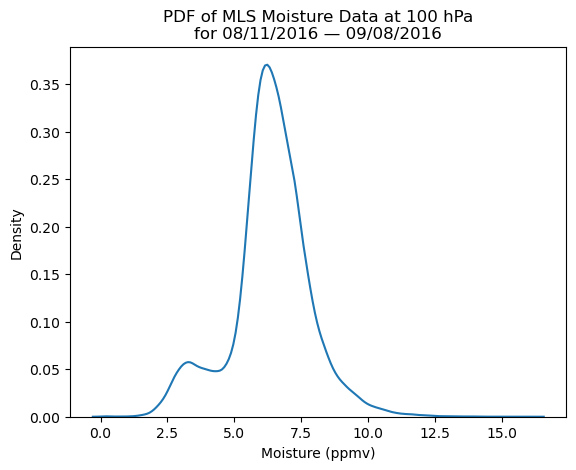

In [ ]:
# Moisture at 100 hPA PDF (MLS)
CreatePDF(MLS_h2o100_hrly_flat)

# Moisture at 100 hPA PDF (UM) TODO
CreatePDF(UM_h2o100_hrly_flat)

Task 5: PDFs of brightness temperature data (UM OLR, GPM_MERGIR)

In [ ]:
# TODO see task5 file